## Metric

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import sys
import numpy as np
sys.path.append('../bd_config')    
from db_query import get_happiness_data

In [3]:
df = get_happiness_data()
df.head(10)

,id,year,social_support,gdp_per_capita,healthy_life_expectancy,freedom,generosity,government_corruption,continent_africa,continent_america,continent_asia,continent_europe,continent_oceania,happiness_score,predicted_happiness_score
0,1,2017,1.436338,1.416915,0.913476,0.505626,0.120573,0.163761,0,0,1,0,0,5.920,6.30629
1,2,2019,0.757000,0.274000,0.505000,0.142000,0.275000,0.078000,1,0,0,0,0,3.973,4.03493
2,3,2019,0.560000,0.191000,0.495000,0.443000,0.218000,0.089000,1,0,0,0,0,3.410,4.14127
3,4,2017,1.548969,0.786441,0.498273,0.658249,0.415984,0.246528,0,0,1,0,0,5.971,5.40629
4,5,2015,1.248230,1.053510,0.787230,0.449740,0.114510,0.084840,0,1,0,0,0,6.574,6.62809
5,6,2015,1.223930,1.228570,0.913870,0.413190,0.331720,0.077850,0,0,1,0,0,7.278,6.24550
6,7,2016,0.234420,0.068310,0.157470,0.043200,0.202900,0.094190,1,0,0,0,0,2.905,3.32355
7,8,2019,1.125000,1.029000,0.893000,0.521000,0.058000,0.100000,0,0,1,0,0,5.191,5.05852
8,9,2015,0.743020,0.266730,0.388470,0.244250,0.461870,0.171750,0,1,0,0,0,4.518,4.25267
9,10,2019,1.360000,1.183000,0.808000,0.195000,0.083000,0.106000,0,0,1,0,0,5.373,5.51848


In [4]:
y_test = df['happiness_score']
y_pred = df['predicted_happiness_score']

##### (R²) Coefficient of determination 

In [5]:
RandomForestr2 = r2_score(y_test, y_pred)

print("Random Forest Regression Model Results:")
print("Coefficient of determination (R^2):", RandomForestr2)

Random Forest Regression Model Results:
Coefficient of determination (R^2): 0.8741481308726622


The coefficient of determination, denoted as R2, is a statistical measure that indicates how closely the values predicted by the model match the actual values of the dependent variable. An R2 of 87% means that the model explains approximately 87% of the variability in the data. In other words, 87% of the variability in the dependent variable can be explained by the characteristics included in the model. An R2 value close to 1 indicates a good fit of the model to the data.

##### (MSE) Mean Squared Error

In [6]:
RandomForestmse = mean_squared_error(y_test, y_pred)

print("Random Forest Regression Model Results:")
print("Mean Squared Error (MSE):", RandomForestmse)

Random Forest Regression Model Results:
Mean Squared Error (MSE): 0.16546877714213704


The mean squared error measures the average squared difference between the values predicted by the model and the actual values. An MSE of 16% indicates that, on average, the model is 16% wrong in predicting the values of the dependent variable. A lower MSE indicates a better fit of the model to the data, as it implies that the predictions are closer to the actual values.

##### (MAE) Mean Absolute Error

In [7]:
RandomForestMAE = mean_absolute_error(y_test, y_pred)

print("Random Forest Regression Model Results:")
print("Mean Squared Error (MAE):", RandomForestMAE)

Random Forest Regression Model Results:
Mean Squared Error (MAE): 0.3179799132235794


The mean absolute error is the average difference between the values predicted by the model and the actual values, regardless of their sign. An MAE of 32% indicates that, on average, the model predictions have an absolute error of 32%. The MAE is less sensitive to outliers compared to the MSE. Similar to the MSE, a lower MAE indicates better model performance.

It is evident that the MAE exceeds the MSE. This suggests that there are certain predictions that diverge notably from the actual values, leading to larger errors and consequently inflating the MAE. Nevertheless, on the whole, most predictions demonstrate high accuracy with minor deviations, thereby lowering the MSE.

We can see this, in the following graph:

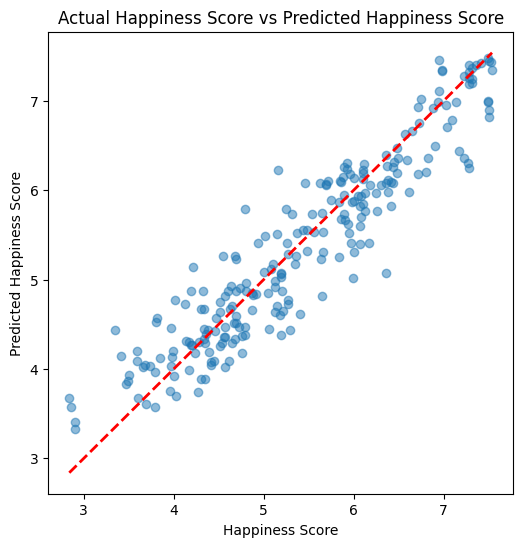

In [8]:
plt.figure(figsize=(6, 6))

plt.scatter(y_test, y_pred, alpha=0.5)

plt.xlabel("Happiness Score")
plt.ylabel("Predicted Happiness Score")

plt.title("Actual Happiness Score vs Predicted Happiness Score")

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.show()

#### Analysis per Prediction

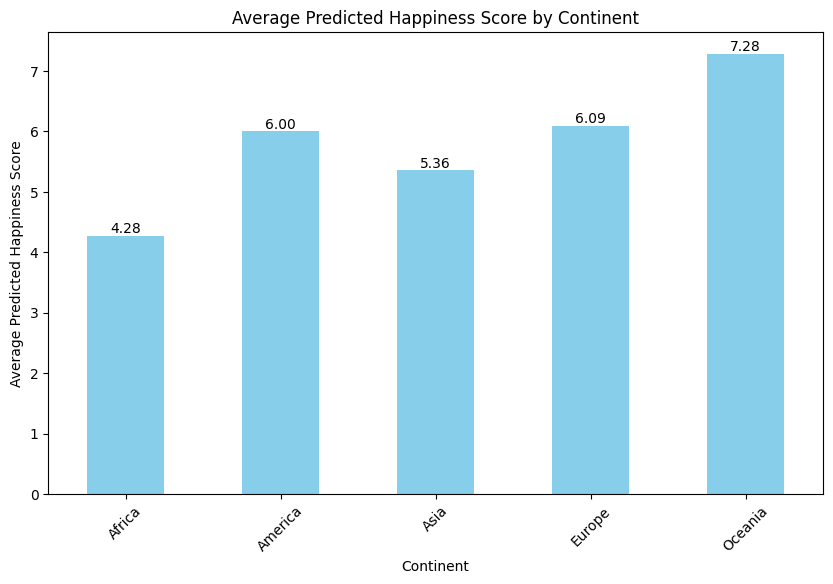

Average Predicted Happiness Score by Continent
continent
Africa     4.279631
America    6.000782
Asia       5.355509
Europe     6.091413
Oceania    7.277540
Name: predicted_happiness_score, dtype: float64


In [17]:
df['continent'] = np.select(
    [
        df['continent_africa'] == 1,
        df['continent_america'] == 1,
        df['continent_asia'] == 1,
        df['continent_europe'] == 1,
        df['continent_oceania'] == 1
    ], 
    [
        'Africa',
        'America',
        'Asia',
        'Europe',
        'Oceania'
    ],
    default='Unknown'
)


mean_happiness_score = df.groupby('continent')['predicted_happiness_score'].mean()


fig, ax = plt.subplots(figsize=(10, 6))
bars = mean_happiness_score.plot(kind='bar', ax=ax, color='skyblue')

for bar in bars.containers:
    bars.bar_label(bar, fmt='%.2f', label_type='edge')

plt.title('Average Predicted Happiness Score by Continent')
plt.xlabel('Continent')
plt.ylabel('Average Predicted Happiness Score')
plt.xticks(rotation=45)
plt.show()

print("Average Predicted Happiness Score by Continent")
print(mean_happiness_score)

These results suggest that, on average, people in Oceania and Europe tend to have higher predicted happiness, while people in Africa tend to have lower predicted happiness. The Americas and Asia fall somewhere in the middle in terms of predicting happiness.